# Multiple Linear Regression
### Automobile Company Case Study

## Problem Statement

## Business Goal 

## Step 1:Data understanding, preparation and EDA

### Reading and Understanding the Data

In [999]:
# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [1000]:
# Import necessry Libraries
import  numpy as np
import pandas as pd
import os
print(os.getcwd())

C:\Users\SHARIE R NATH\Documents\LR ASSIGNMENT


#### Reading the dataset

In [1001]:
Car_Price= pd.read_csv("./CarPrice_Assignment.csv")

In [1002]:
# Check the dataset
Car_Price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Understanding the dataset

In [1003]:
Car_Price.shape

(205, 26)

In [1004]:
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1005]:
Car_Price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Data Cleaning and Preparation

#### Checking for missing value imputation, removing duplicate data,outliers and other kinds of data redundancies.

In [1006]:
# Checking for null values
Car_Price.isnull().any().sum()

0

In [1007]:
#Checking for NA values
Car_Price.isna().any().sum()

0

Null and NA Values are absent

In [1008]:
#Checking for duplicates
Car_Price.loc[Car_Price.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [1009]:
Car_Price=Car_Price.drop_duplicates()

In [1010]:
Car_Price.loc[Car_Price.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Duplicates Removed

##### Checking for Outliers

In [1011]:
print(Car_Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
85%    174.400000    2.000000  104.660000  188.200000   68.340000   56.100000   
90%    184.600000    3.000000  107.900000  188.800000   68.640000   56.620000   
100%   205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  engines

No specific outliers observed

##### Extracting Car company from Car name

In [1012]:
new =  Car_Price['CarName'].str.split(" ", n = 1, expand = True) 
  
# making separate name column from new data frame 
Car_Price['CarCompany']= new[0] 
  
# making separate last name column from new data frame 
Car_Price['CarModel']= new[1] 

Car_Price['CarCompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
maxda           2
vw              2
toyouta         1
Nissan          1
porcshce        1
vokswagen       1
mercury         1
Name: CarCompany, dtype: int64

##### Cleansing Car Company name

There are certain errors observed in the company names. Replacing those values with appropriate ones
toyouta---toyota
maxda----mazda
vw----volkswagen
vokswagen----volkswagen
Nissan----nissan
porcshce----porsche

In [1013]:
#Cleansing Car company name
Car_Price['CarCompany'].replace("toyouta","toyota",inplace= True)
Car_Price['CarCompany'].replace("maxda","mazda",inplace= True)
Car_Price['CarCompany'].replace("vw","volkswagen",inplace= True)
Car_Price['CarCompany'].replace("vokswagen","volkswagen",inplace= True)
Car_Price['CarCompany'].replace("Nissan","nissan",inplace= True)
Car_Price['CarCompany'].replace("porcshce","porsche",inplace= True)


#### Derived Columns

###### power_weight_ratio= horsepower/curbweight

In [1014]:
Car_Price['power_weight_ratio']=Car_Price['horsepower']/Car_Price['curbweight']

###### fueleconomy is calculated as the aggregate of  55% city mileage plus 44%  highway mileage

In [1015]:
Car_Price['fueleconomyvalue']=(0.55*Car_Price['citympg'])+(0.45*Car_Price['highwaympg'])


#### Categorizing Car Company as Budget, Medium and High end 

In [1016]:
#Calculating the average price company wise using groupby
df_temp = Car_Price.copy()
df_temp['price'] = df_temp['price'].astype('int')
Comp_avg = df_temp.groupby(['CarCompany'])['price'].mean()
df_temp = df_temp.merge(Comp_avg.reset_index(), how='left',on='CarCompany')
df_temp.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price_x', 'CarCompany', 'CarModel', 'power_weight_ratio',
       'fueleconomyvalue', 'price_y'],
      dtype='object')

In [1017]:
#Binning the Car Companies based on avg prices of each Company.
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','High-End']
Car_Price['Car_Range'] = pd.cut(df_temp['price_y'],bins,right=False,labels=cars_bin)
Car_Price.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,power_weight_ratio,fueleconomyvalue,Car_Range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,alfa-romero,giulia,0.043564,23.70,Medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,alfa-romero,stelvio,0.043564,23.70,Medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0.054552,22.15,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,audi,100 ls,0.043646,26.70,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,audi,100ls,0.040722,19.80,Medium


#### Visualizing the dataset

#### Visualise our data using `matplotlib` and `seaborn`

In [1018]:
#Importing plotting Libraries

import matplotlib.pyplot as plt
import seaborn as sns

##### Visualize Numeric Variables

In [1019]:
Numer_vars= Car_Price.select_dtypes([np.number])
len(Numer_vars.columns)

18

##### HeatMap to visualize correlation

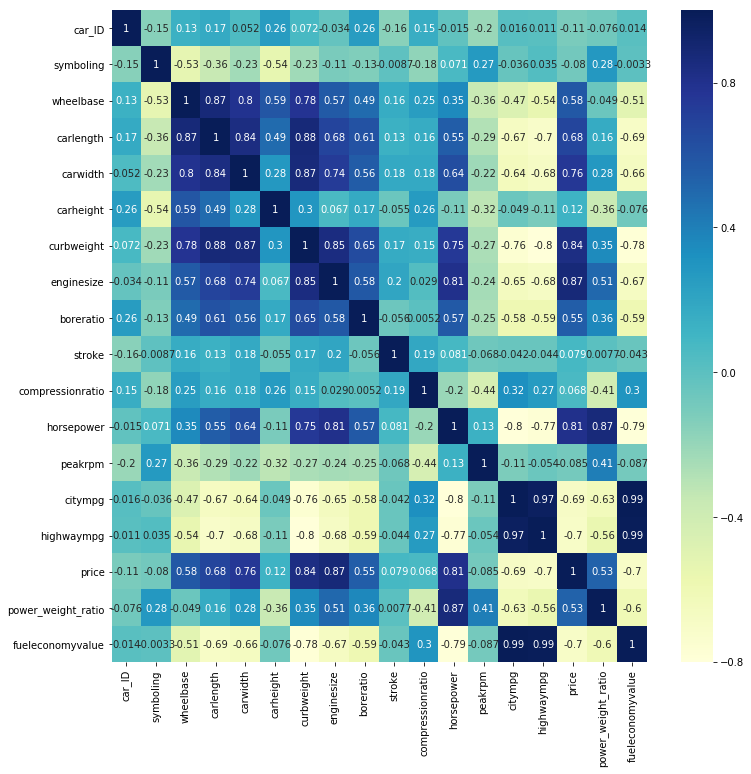

In [1020]:
plt.figure(figsize = (12, 12))
sns.heatmap(Car_Price.corr(), annot = True, cmap="YlGnBu")
plt.show()


##### Pair-wise scatter plots

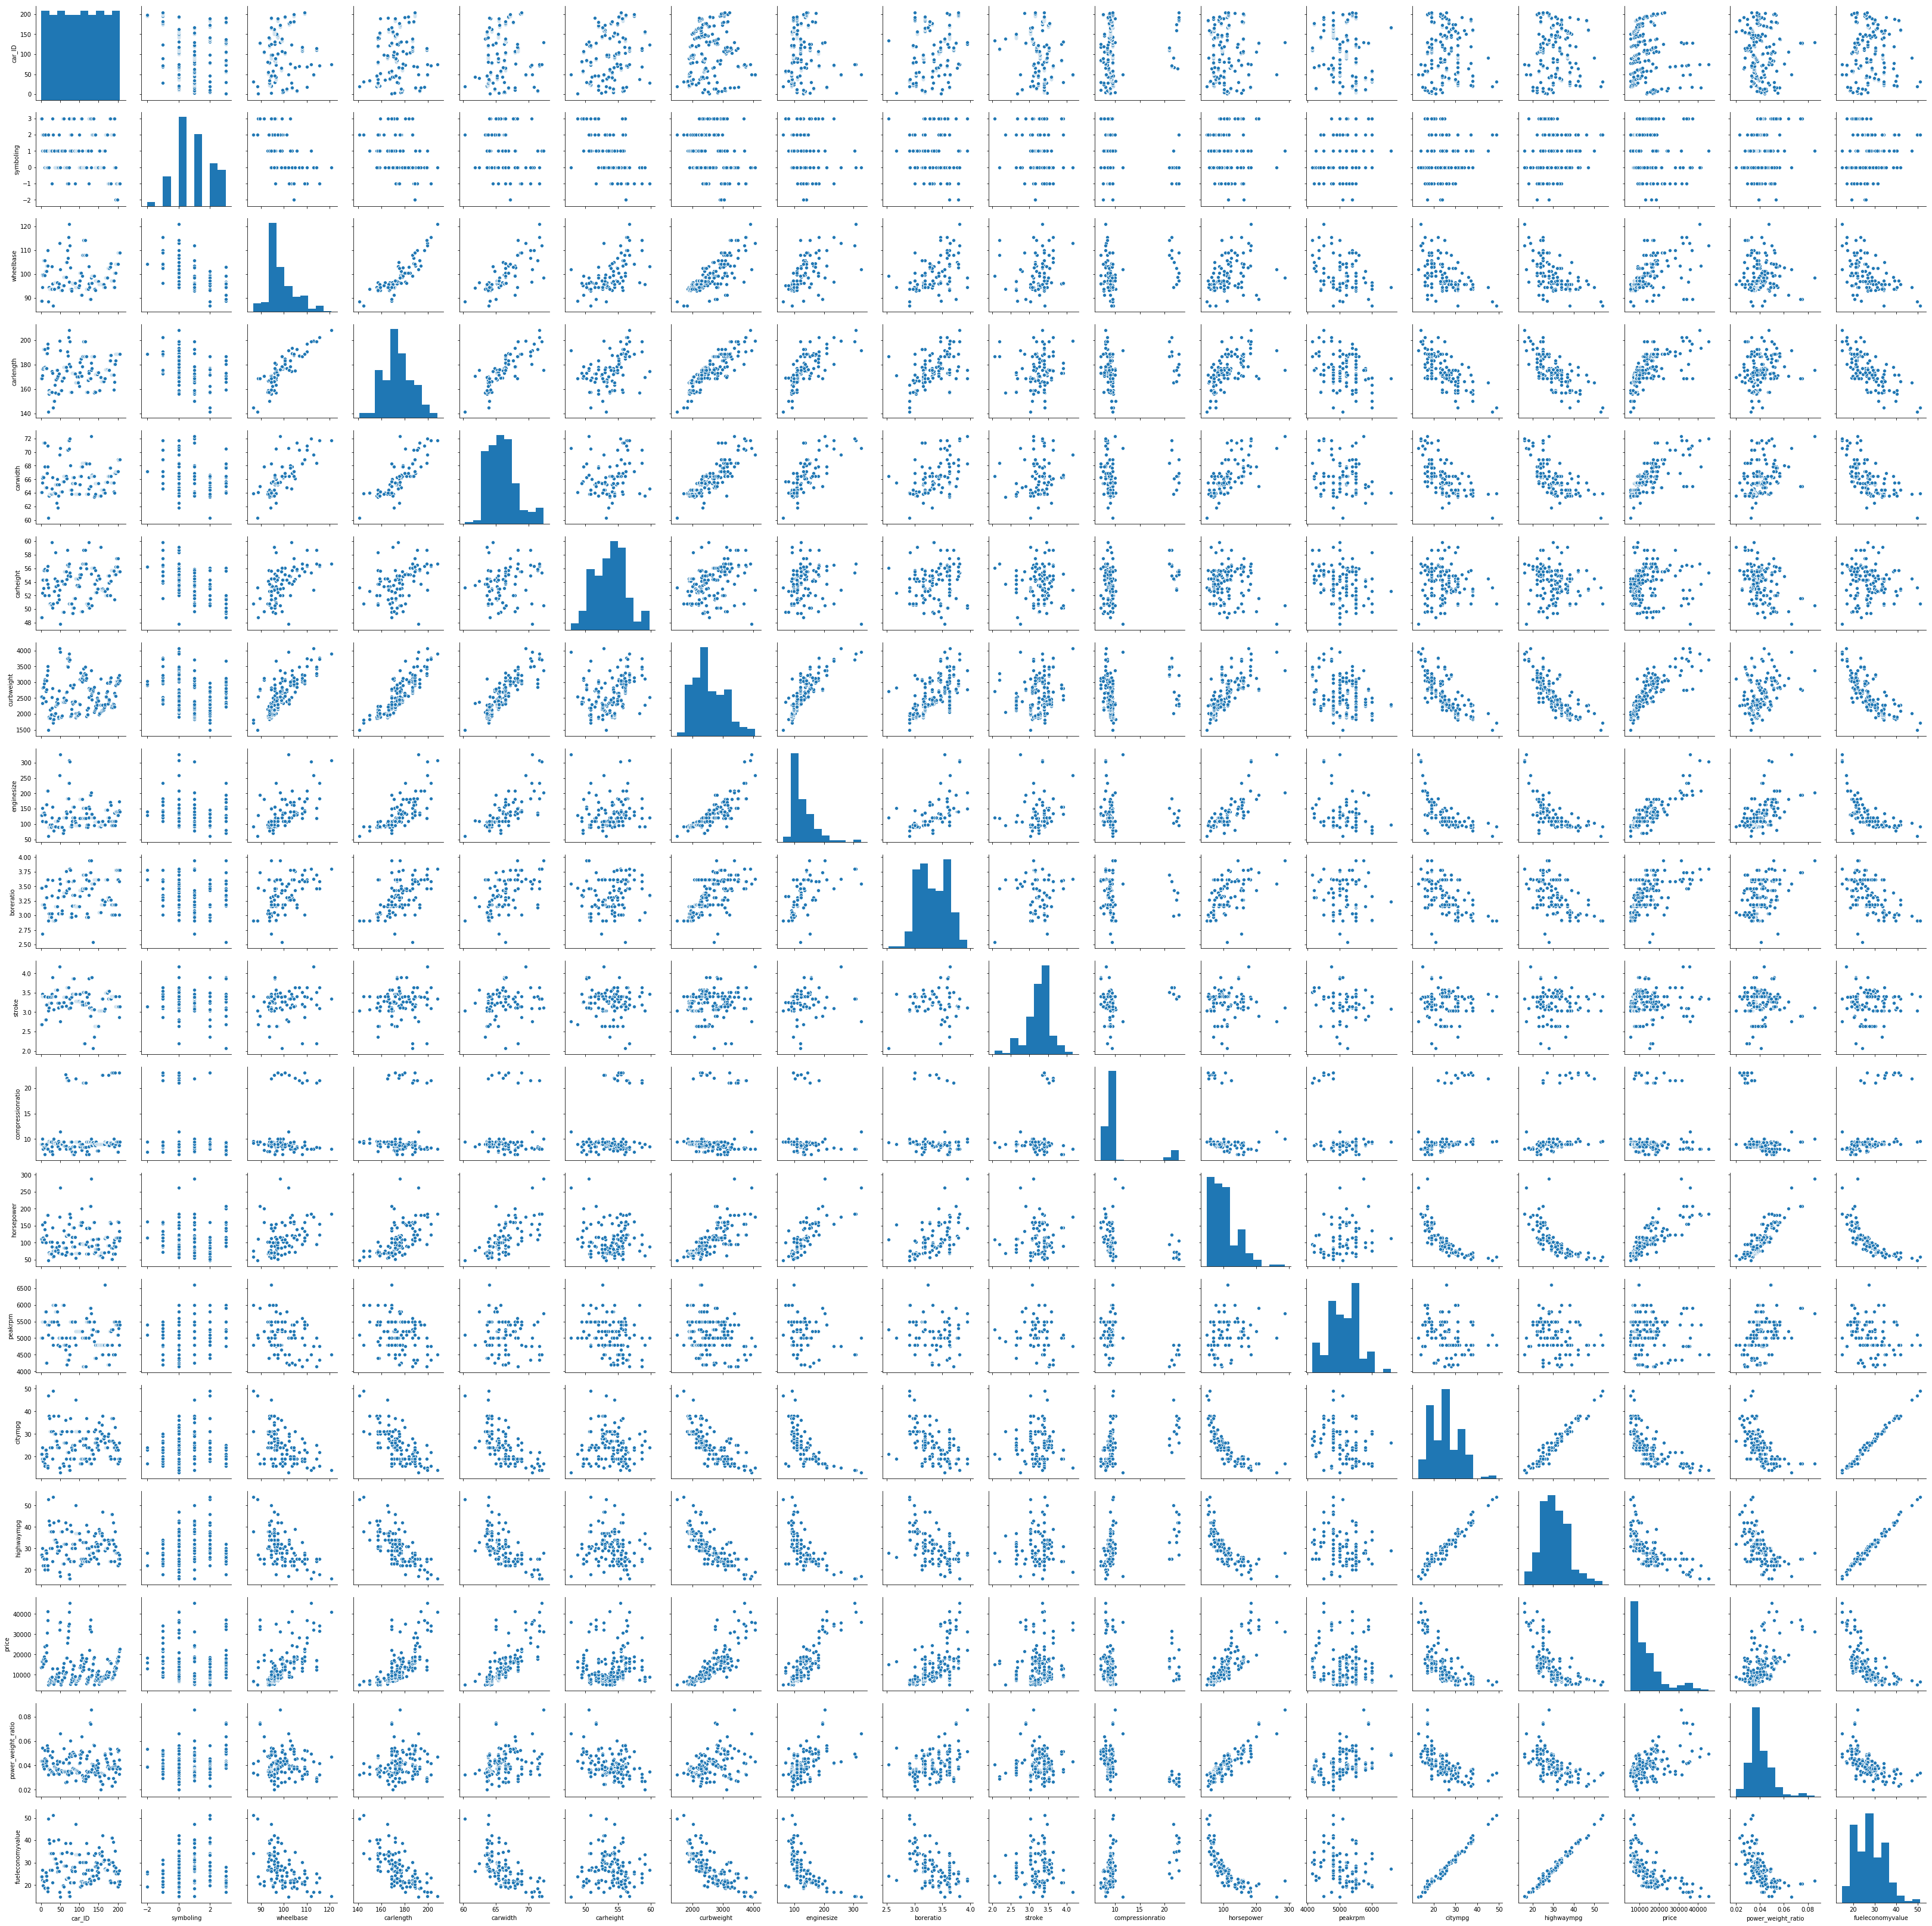

In [1021]:
sns.pairplot(Car_Price)
plt.show()

#### Univariant Analysis of price

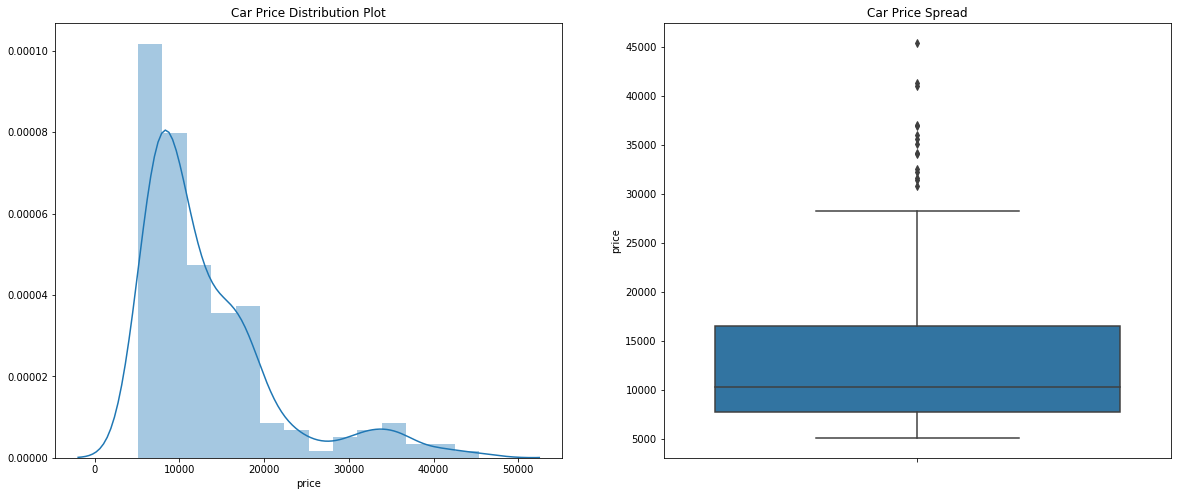

In [1022]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(Car_Price['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=Car_Price['price'])

plt.show()

##### Checking for any outliers in price

In [1023]:
print(Car_Price['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### No outliers found

##### Visualizing Categorical Variables

In [1024]:
Categ_vars= Car_Price.select_dtypes('object')
Categ_vars.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarCompany', 'CarModel'],
      dtype='object')

### Bivariant Analysis

##### Box plot for various categories

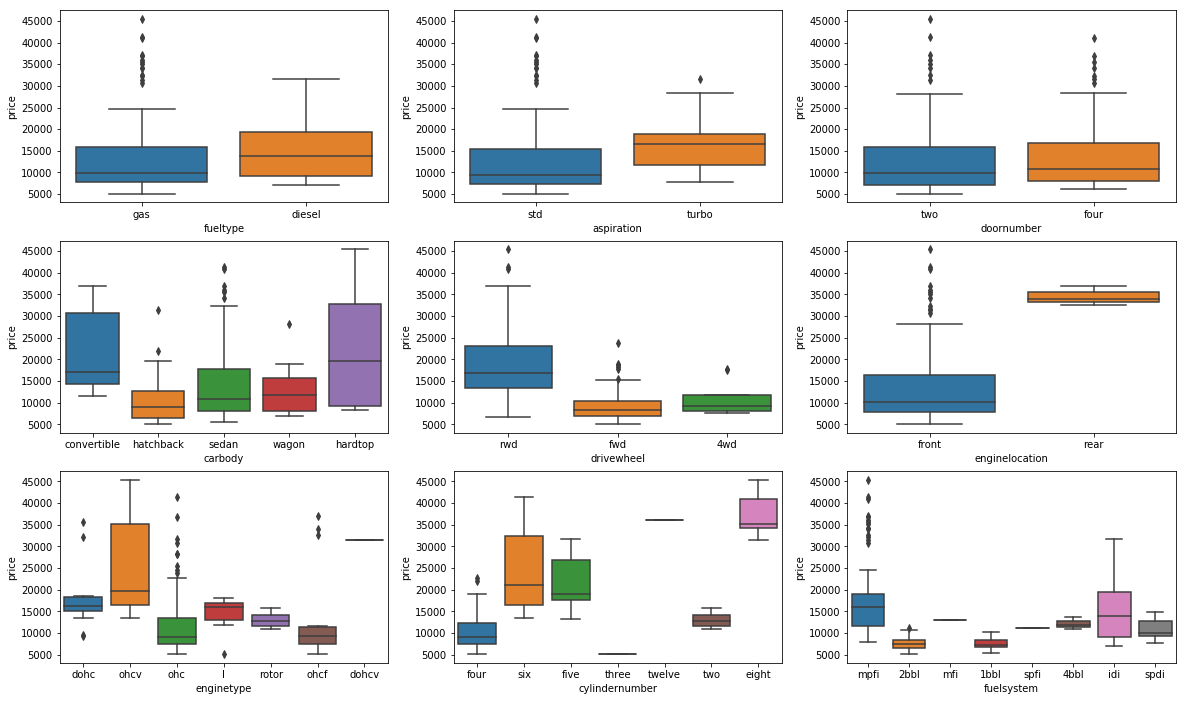

In [1025]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = Car_Price)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = Car_Price)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = Car_Price)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = Car_Price)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = Car_Price)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = Car_Price)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = Car_Price)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = Car_Price)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = Car_Price)
plt.show()

#### Price Vz CarCompany

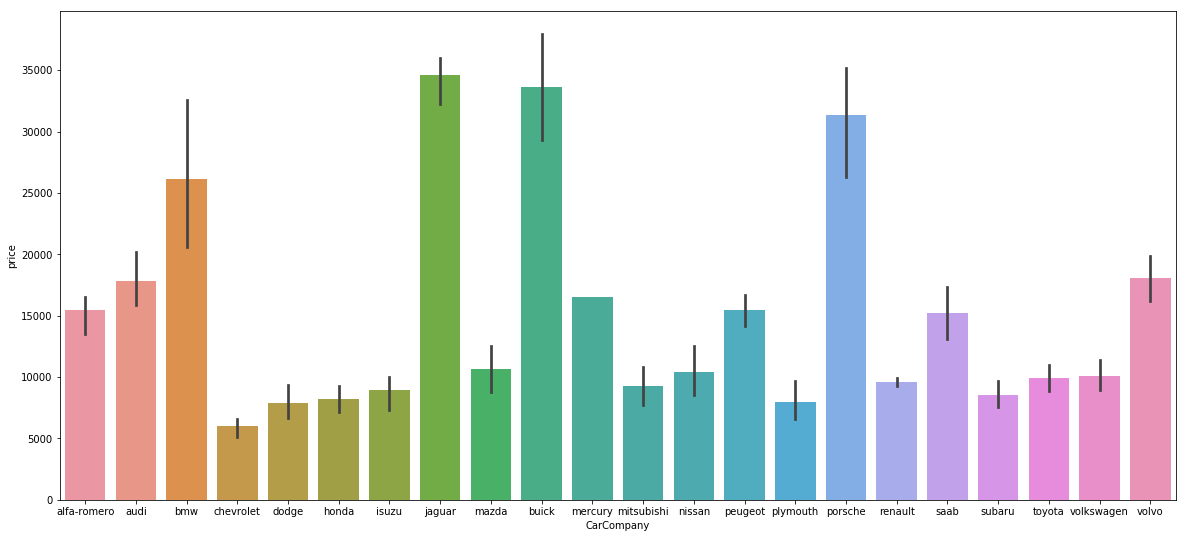

In [1026]:
plt.figure(figsize=(20, 9))
sns.barplot(x = 'CarCompany', y = 'price', data = Car_Price)
plt.show()

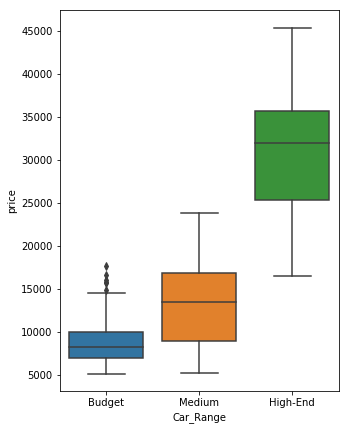

In [1027]:
# Car Range Vz Price spread
plt.figure(figsize=(5, 7))
sns.boxplot(x='Car_Range', y='price',data=Car_Price)
plt.show()

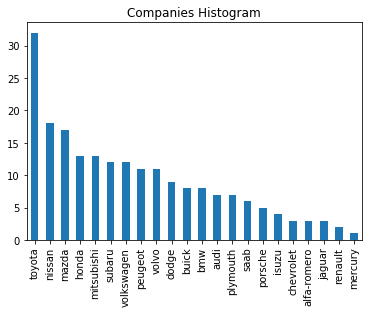

In [1028]:
x=Car_Price['CarCompany'].value_counts()
x.plot(kind='bar',title="Companies Histogram")


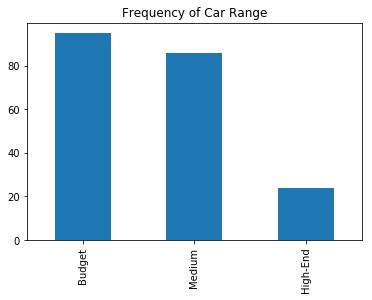

In [1029]:
x=Car_Price['Car_Range'].value_counts()
x.plot(kind='bar',title="Frequency of Car Range")


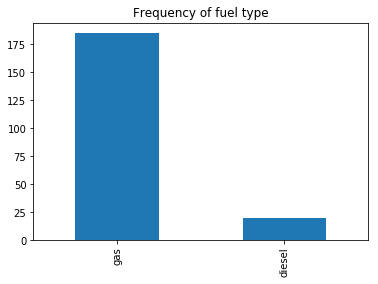

In [1030]:
x=Car_Price['fueltype'].value_counts()
x.plot(kind='bar',title="Frequency of fuel type")


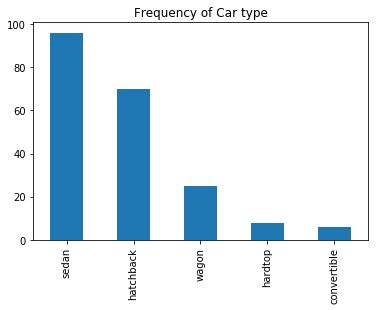

In [1031]:
x=Car_Price['carbody'].value_counts()
x.plot(kind='bar',title="Frequency of Car type")


### Inferences

### Model building and evaluation 

### Data Preparation 

In [1032]:
Categ_vars.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompany,CarModel
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,giulia
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,stelvio
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,Quadrifoglio
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,100 ls
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,100ls


##### Dummy Encoding

Dummy encoding is done to convert n level categorical variables to numeric

In [1033]:
Categ_vars.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarCompany', 'CarModel'],
      dtype='object')

In [1034]:
#Selecting columns to create dummy variables
dummy_Var_list= ['Car_Range','fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem','symboling']

In [1035]:
# Taking the data for categorical variables into a dictionary 

Dict_values={}
for col_name in dummy_Var_list:

    #temp_dm=pd.get_dummies(data[col_name], drop_first = False)
    Dict_values[col_name]=Car_Price[col_name].unique()
    
string=""    
    
for key, value in Dict_values.items():
    string+=str(key) + ":" +str(value) + "\n"

    

print(string)


Car_Range:[Medium, High-End, Budget]
Categories (3, object): [Budget < Medium < High-End]
fueltype:['gas' 'diesel']
aspiration:['std' 'turbo']
doornumber:['two' 'four']
carbody:['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel:['rwd' 'fwd' '4wd']
enginelocation:['front' 'rear']
enginetype:['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber:['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem:['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
symboling:[ 3  1  2  0 -1 -2]



#### Function to create dummy variable

In [1036]:
#Function to craete dummy variables
def dummy_variable(col_name,data):
    #Create Dummies for the variable
    
    temp_dm=pd.get_dummies(data[col_name], drop_first = True)
    
    #Prefixing the dummy columns with appropriate name
    pref_col=str(col_name)+ "_"
    temp_dm=temp_dm.add_prefix(pref_col)
    
    return temp_dm

####3 Adding dummy variables dropping one level to the original dataset

In [1037]:
data= Car_Price.copy()
dummy_data= pd.DataFrame()
for col in dummy_Var_list:
    temp_data=dummy_variable(col,data)
       
    #Conacatenating the dummy variables to Car_Price dataset
    dummy_data = pd.concat([dummy_data,temp_data], axis = 1)
    
    #Dropping the variable to avoid redundancy
    
    
Car_Price = pd.concat([Car_Price,dummy_data], axis = 1)
     
Car_Price.drop(dummy_Var_list, axis = 1, inplace = True)
        
print("Dummy variables added")

Dummy variables added


In [1038]:
# Insignificant columns to be dropped
to_drop_list=['car_ID', 'CarName','CarModel','CarCompany']
Car_Price.drop(to_drop_list, axis = 1, inplace = True)

In [1039]:
Car_Price.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'power_weight_ratio',
       'fueleconomyvalue', 'Car_Range_Medium', 'Car_Range_High-End',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symbol

In [1040]:
Car_Price.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.097561,0.004878,0.458537,0.043902,0.004878,0.107317,0.326829,0.263415,0.156098,0.131707
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.297446,0.069843,0.499498,0.205380,0.069843,0.310274,0.470202,0.441564,0.363836,0.339000
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 2: Splitting the Data into Training and Testing Sets


In [1041]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Car_Price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1042]:
df_train.shape

(143, 52)

In [1043]:
df_test.shape

(62, 52)

### Rescaling 

MinMax scaling of features

In [1044]:
#Importing Minmax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1045]:
#Minmax scaling the train dataset
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','curbweight',
       'peakrpm', 'power_weight_ratio', 'fueleconomyvalue']

#Performing fit_transform on train data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1046]:
Numer_vars.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'power_weight_ratio', 'fueleconomyvalue'],
      dtype='object')

In [1047]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.090909,0.0,0.440559,0.041958,0.0,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.288490,0.0,0.498199,0.201198,0.0,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


##### Function to get top absolute correlations

In [1048]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [1049]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_train, 15))

Top Absolute Correlations
enginetype_rotor    cylindernumber_two    1.000000
fueltype_gas        fuelsystem_idi        1.000000
citympg             fueleconomyvalue      0.994357
highwaympg          fueleconomyvalue      0.992206
compressionratio    fuelsystem_idi        0.983638
                    fueltype_gas          0.983638
citympg             highwaympg            0.973389
drivewheel_fwd      drivewheel_rwd        0.887644
carlength           curbweight            0.881495
wheelbase           carlength             0.877909
carwidth            curbweight            0.873884
enginesize          price                 0.867915
curbweight          enginesize            0.865102
cylindernumber_two  fuelsystem_4bbl       0.862927
enginetype_rotor    fuelsystem_4bbl       0.862927
dtype: float64


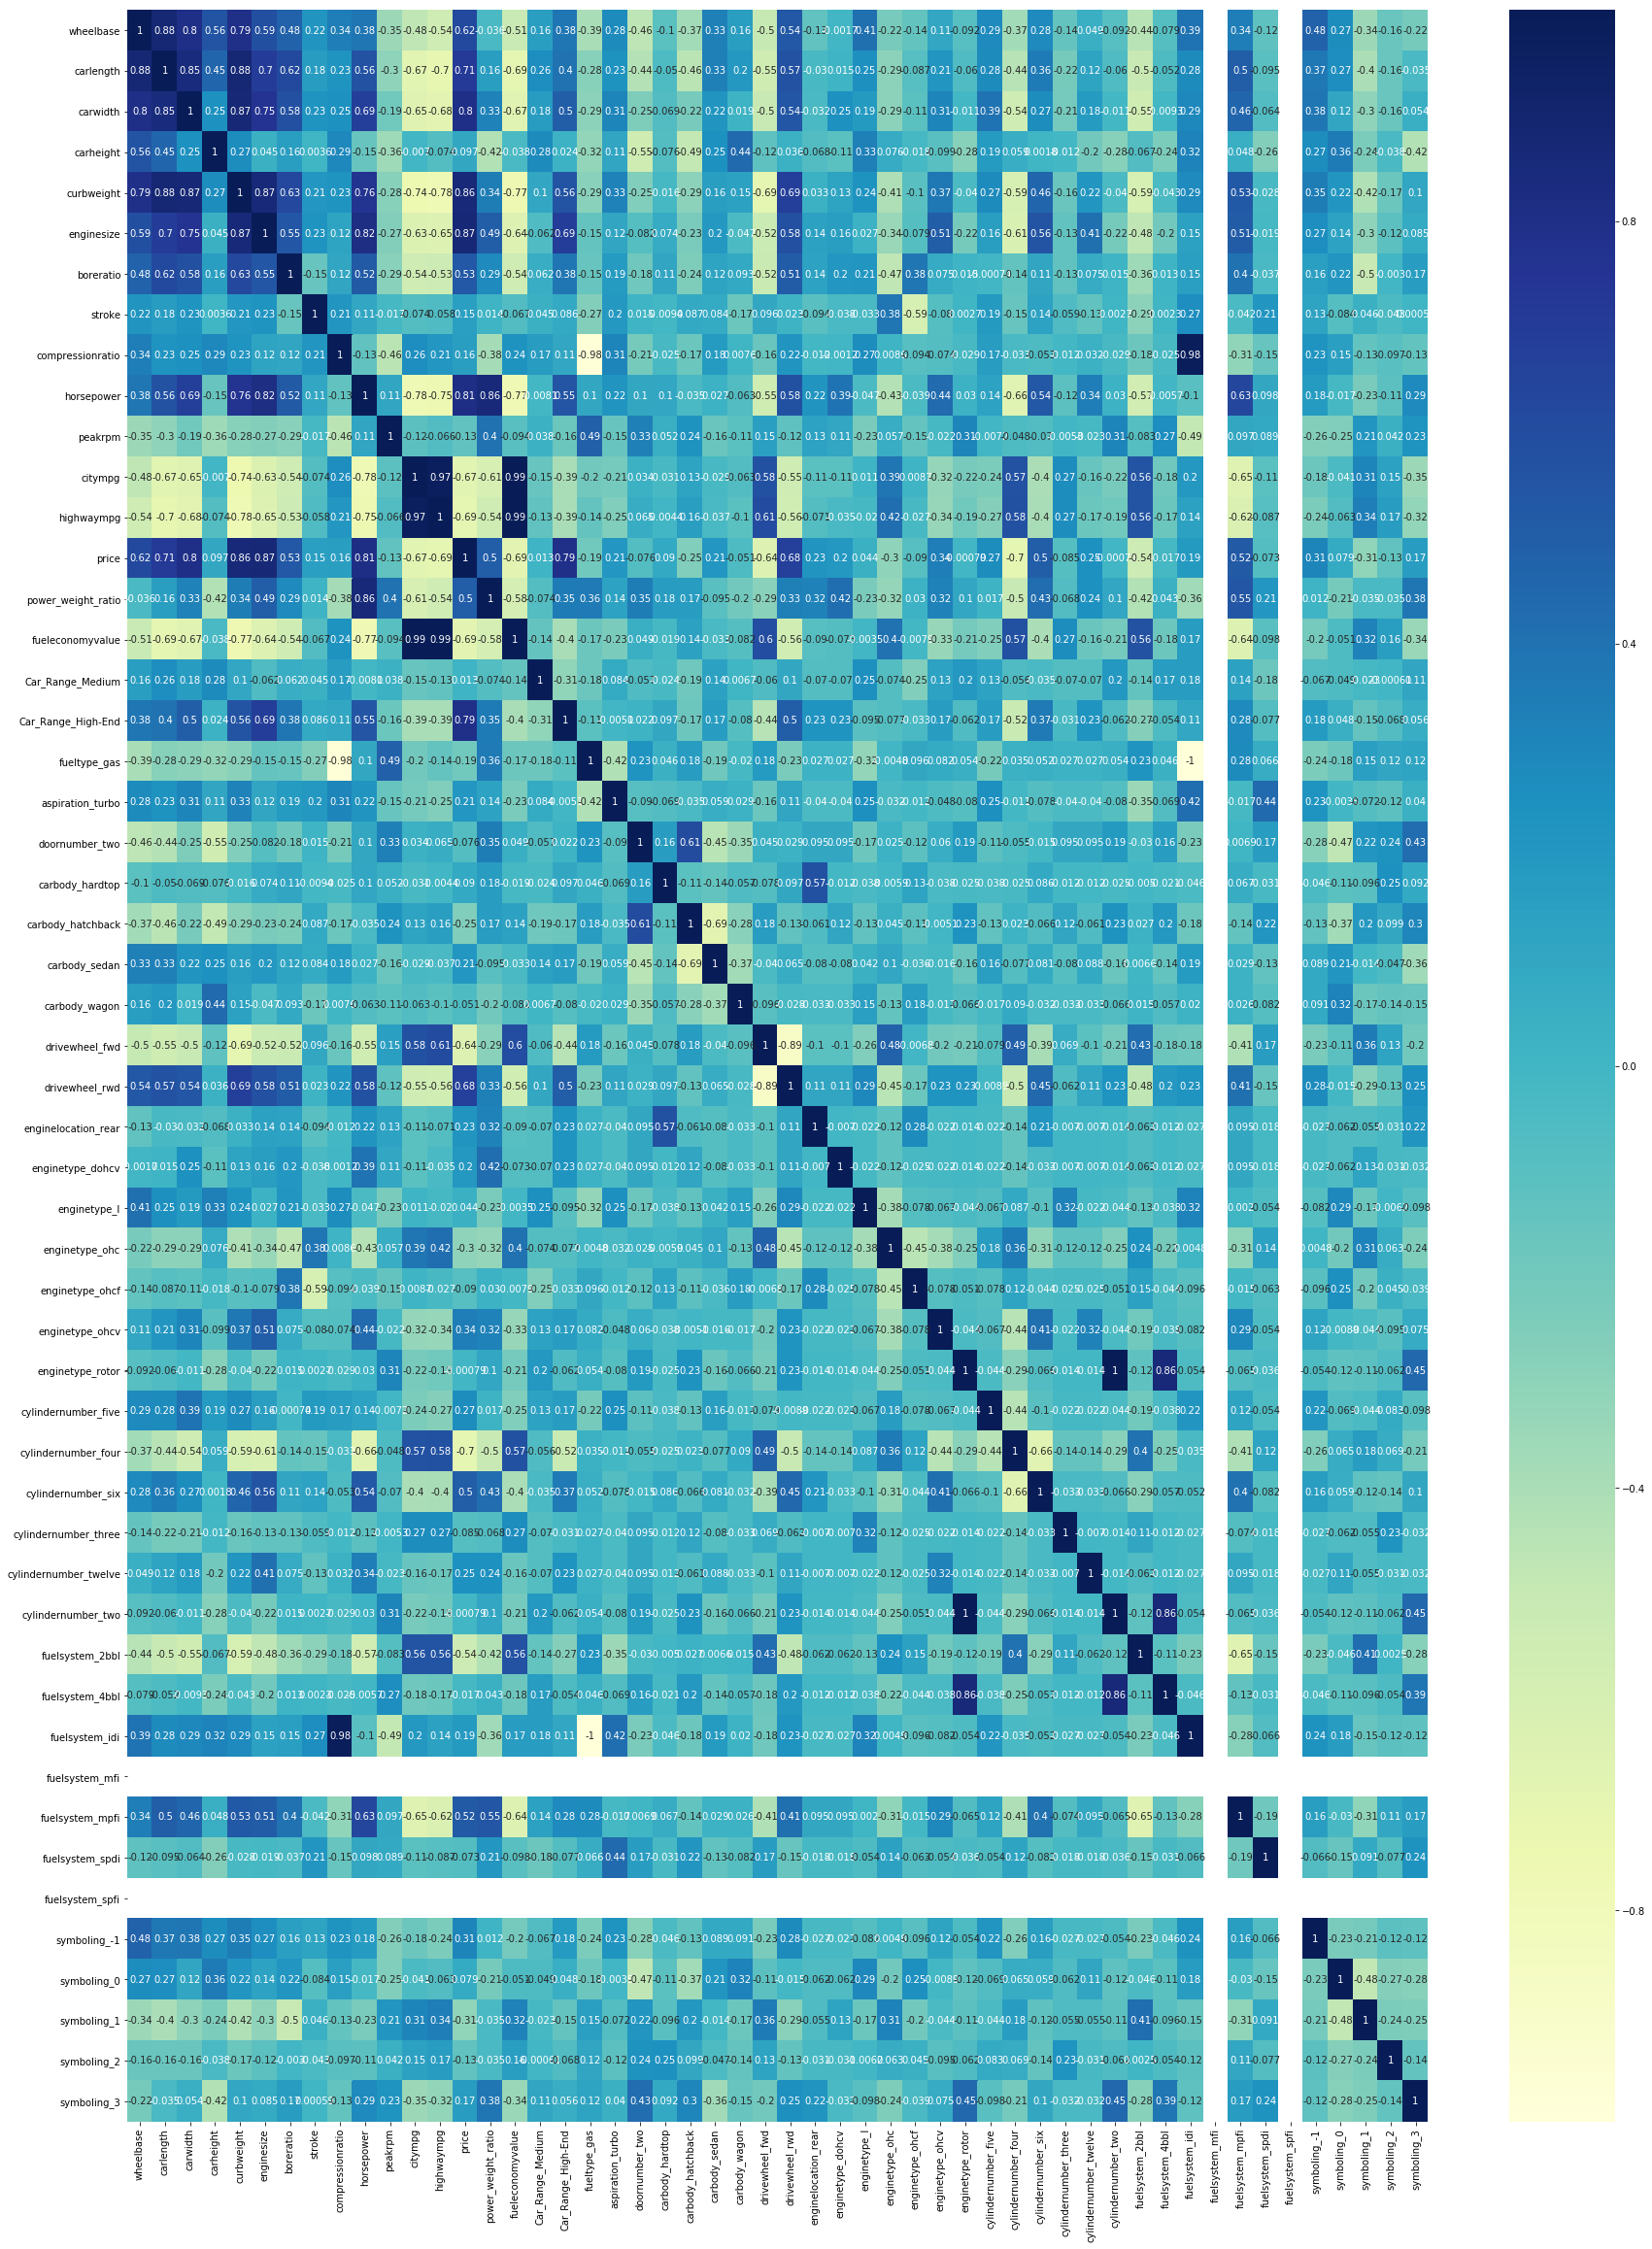

In [1050]:
#Heatmap fort train data
plt.figure(figsize = (30, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 3: Model Building

### Dividing into X and Y sets for the model building

In [1051]:
y_train = df_train.pop('price')
X_train = df_train

In [1052]:
X_train.shape

(143, 51)

### Building the model with RFE

### RFE
#### Recursive Feature Elimination

The X_train have 51 feature data.
Hence Using RFE 15 variables are selected automatically and  then manual modelling is done on the RFE selected features

In [1053]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
#define Linear REgression object
lm = LinearRegression()
#fit on train data
lm.fit(X_train, y_train)
#running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)
#Listing train data columns RFE support and Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 17),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('stroke', False, 5),
 ('compressionratio', False, 4),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('citympg', False, 33),
 ('highwaympg', False, 34),
 ('power_weight_ratio', True, 1),
 ('fueleconomyvalue', False, 35),
 ('Car_Range_Medium', False, 18),
 ('Car_Range_High-End', True, 1),
 ('fueltype_gas', False, 21),
 ('aspiration_turbo', False, 22),
 ('doornumber_two', False, 32),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 23),
 ('drivewheel_rwd', False, 30),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 29),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 9),
 ('enginetype_ohcv', False, 12),
 ('enginetype_rotor', False, 6),
 ('cylindernumbe

##### Selecting columns with RFE support

In [1054]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'power_weight_ratio', 'Car_Range_High-End', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_dohcv', 'cylindernumber_three',
       'cylindernumber_twelve'],
      dtype='object')

In [1055]:
 #Columns without RFE support
X_train.columns[~rfe.support_]

Index(['carlength', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 'highwaympg', 'fueleconomyvalue',
       'Car_Range_Medium', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3'],
      dtype='object')

### Building model using statsmodel for the detailed statistics

##### Function to calculate Variance_Inflation_Factor

In [1056]:
def VIF_Calc(data):

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

##### Function to build OLS linear regression model using statsmodels

In [1057]:
def statsapi_model(y_data,X_data):
    
     # Adding a constant variable 
    import statsmodels.api as sm  
    X_data_lm = sm.add_constant(X_data)
    # Running the linear model
    lm = sm.OLS(y_data,X_data_lm).fit()
    #Return the linear model
    return lm

#### Modeling using  statsmodels with RFE selected variables


In [1058]:
# Modeling with RFE selected variables
X_train_rfe = X_train[col]
# Stats modeling
lm=statsapi_model(y_train,X_train_rfe)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     137.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.54e-71
Time:                        23:01:34   Log-Likelihood:                -1280.7
No. Observations:                 143   AIC:                             2593.
Df Residuals:                     127   BIC:                             2641.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.549e+

In [1059]:
VIF_1=VIF_Calc(X_train_rfe)
VIF_1

,Features,VIF
4,horsepower,106.64
2,curbweight,90.03
5,power_weight_ratio,84.48
1,carwidth,45.95
0,wheelbase,31.81
3,enginesize,29.49
9,carbody_sedan,18.77
8,carbody_hatchback,12.94
10,carbody_wagon,5.73
6,Car_Range_High-End,2.39


##### Removing wheelbase

Whhelbase have high p-value and high VIF

In [1060]:
X_train_new=X_train_rfe

In [1061]:
temp=X_train_new.pop('wheelbase')


In [1062]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.82e-71
Time:                        23:01:34   Log-Likelihood:                -1282.1
No. Observations:                 143   AIC:                             2594.
Df Residuals:                     128   BIC:                             2639.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.408e+

#### Dropping wheelbase:Model improved considerably

In [1063]:
VIF_new= VIF_Calc(X_train_new)
VIF_new

,Features,VIF
3,horsepower,104.66
1,curbweight,84.19
4,power_weight_ratio,75.83
0,carwidth,38.49
2,enginesize,29.22
8,carbody_sedan,15.32
7,carbody_hatchback,11.48
9,carbody_wagon,4.98
5,Car_Range_High-End,2.38
6,carbody_hardtop,2.13


#### Removing cylindernumber_three

cylindernumber_three due to High p-value 

In [1064]:
temp=X_train_new.pop('cylindernumber_three')

In [1065]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.04e-72
Time:                        23:01:34   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2595.
Df Residuals:                     129   BIC:                             2637.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.502e+

#### Dropping cylindernumber_three :-Model varied lightly

In [1066]:
VIF_new= VIF_Calc(X_train_new)
VIF_new

,Features,VIF
3,horsepower,104.64
1,curbweight,83.95
4,power_weight_ratio,75.83
0,carwidth,37.65
2,enginesize,29.22
8,carbody_sedan,15.17
7,carbody_hatchback,11.27
9,carbody_wagon,4.95
5,Car_Range_High-End,2.37
6,carbody_hardtop,2.13


#####  Removing cylindernumber_twelve



In [1067]:
temp=X_train_new.pop('cylindernumber_twelve')

In [1068]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.19e-71
Time:                        23:01:34   Log-Likelihood:                -1286.9
No. Observations:                 143   AIC:                             2600.
Df Residuals:                     130   BIC:                             2638.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.25e+04   2

F-statistics incraesed to 160

In [1069]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
3,horsepower,91.70
1,curbweight,69.57
4,power_weight_ratio,68.66
0,carwidth,37.60
2,enginesize,25.86
8,carbody_sedan,14.35
7,carbody_hatchback,10.76
9,carbody_wagon,4.58
5,Car_Range_High-End,2.36
6,carbody_hardtop,2.10


#####  Removing power_weight_ratio
High VIF value due to relation with horsepower and curbweight

In [1070]:
temp= X_train_new.pop('power_weight_ratio')

In [1071]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     161.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.60e-70
Time:                        23:01:34   Log-Likelihood:                -1292.6
No. Observations:                 143   AIC:                             2609.
Df Residuals:                     131   BIC:                             2645.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4656.8425   1

###### power_weight_ratio insignificant as no much variation in model statistics

In [1072]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
1,curbweight,48.32
0,carwidth,36.88
2,enginesize,25.04
3,horsepower,14.36
7,carbody_sedan,4.99
6,carbody_hatchback,3.09
4,Car_Range_High-End,2.34
8,carbody_wagon,2.19
9,enginelocation_rear,1.73
5,carbody_hardtop,1.62


#### Removing enginetype_dohcv

In [1073]:
temp= X_train_new.pop('enginetype_dohcv')

In [1074]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.51e-70
Time:                        23:01:34   Log-Likelihood:                -1295.9
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     132   BIC:                             2646.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4787.6435   1

##### Slight variation in model statistics

In [1075]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
1,curbweight,43.90
0,carwidth,34.08
2,enginesize,24.03
3,horsepower,10.88
7,carbody_sedan,4.90
6,carbody_hatchback,3.04
4,Car_Range_High-End,2.22
8,carbody_wagon,2.19
9,enginelocation_rear,1.68
5,carbody_hardtop,1.62


#### Removing enginesize

Due to High p-value

In [1076]:
temp=X_train_new.pop('enginesize')

In [1077]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.23e-71
Time:                        23:01:34   Log-Likelihood:                -1296.2
No. Observations:                 143   AIC:                             2612.
Df Residuals:                     133   BIC:                             2642.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4677.1085   1

#### Model statistics incaresed to 189 and r2 scores stable with dropping of enginesize

In [1078]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
0,carwidth,33.91
1,curbweight,32.33
2,horsepower,9.11
6,carbody_sedan,4.82
5,carbody_hatchback,3.03
7,carbody_wagon,2.16
3,Car_Range_High-End,1.87
8,enginelocation_rear,1.68
4,carbody_hardtop,1.60


#### Removing carbody_hardtop
Due to high p-value

In [1079]:
temp=X_train_new.pop('carbody_hardtop')

In [1080]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     208.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.36e-72
Time:                        23:01:34   Log-Likelihood:                -1298.2
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     134   BIC:                             2641.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.7806   1

#### Overall model statistics is good 

In [1081]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
0,carwidth,33.29
1,curbweight,32.33
2,horsepower,9.11
5,carbody_sedan,4.60
4,carbody_hatchback,2.91
6,carbody_wagon,2.10
3,Car_Range_High-End,1.85
7,enginelocation_rear,1.15


#### Removing carbody_sedan
Due to high p-value

In [1082]:
temp=X_train_new.pop('carbody_sedan')

In [1083]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     233.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.95e-72
Time:                        23:01:34   Log-Likelihood:                -1300.2
No. Observations:                 143   AIC:                             2616.
Df Residuals:                     135   BIC:                             2640.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1841.3464    

##### Overall model statistics improving

In [1084]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
1,curbweight,32.28
0,carwidth,23.45
2,horsepower,8.86
3,Car_Range_High-End,1.79
4,carbody_hatchback,1.57
5,carbody_wagon,1.37
6,enginelocation_rear,1.15


#### Removing curbweight
Due to high VIF value

In [1085]:
temp=X_train_new.pop('curbweight')

In [1086]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.00e-67
Time:                        23:01:34   Log-Likelihood:                -1316.2
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     136   BIC:                             2667.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1933.8944    

#### Model statistics  decreased.Hence adding curbweight back

In [1087]:
#Reconcatinating curbweight column
X_train_new=pd.concat([X_train_new,temp],axis=1)

In [1088]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
6,curbweight,32.28
0,carwidth,23.45
1,horsepower,8.86
2,Car_Range_High-End,1.79
3,carbody_hatchback,1.57
4,carbody_wagon,1.37
5,enginelocation_rear,1.15


#### Removing enginelocation_rear
Trying for VIF reduction

In [1089]:
temp=X_train_new.pop('enginelocation_rear')

In [1090]:
lm=statsapi_model(y_train,X_train_new)

##### Model improving

In [1091]:
temp=X_train_new.pop('carbody_hatchback')

In [1092]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.33e-71
Time:                        23:01:34   Log-Likelihood:                -1309.0
No. Observations:                 143   AIC:                             2630.
Df Residuals:                     137   BIC:                             2648.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1612.5406    569

#### p- values increased .Hence adding back "carbody_hatchback"

In [1093]:
X_train_new=pd.concat([X_train_new,temp],axis=1)

In [1094]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
4,curbweight,31.94
0,carwidth,23.42
1,horsepower,8.20
2,Car_Range_High-End,1.75
5,carbody_hatchback,1.57
3,carbody_wagon,1.37


#### Removing carbody_wagon

In [1095]:
temp=X_train_new.pop('carbody_wagon')

In [1096]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     285.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.30e-70
Time:                        23:01:34   Log-Likelihood:                -1309.9
No. Observations:                 143   AIC:                             2632.
Df Residuals:                     137   BIC:                             2650.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1946.7654    624

#### p-values reduced and model improving

In [1097]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
3,curbweight,28.72
0,carwidth,22.99
1,horsepower,7.93
2,Car_Range_High-End,1.67
4,carbody_hatchback,1.54


#### Removing curbweight

Removing again after droping other variables  because of its high VIF

In [1098]:
temp=X_train_new.pop('curbweight')

In [1099]:
lm=statsapi_model(y_train,X_train_new)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        23:01:35   Log-Likelihood:                -1320.0
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     138   BIC:                             2665.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2133.8629    666

##### At this stage dropping curbweight improved the model considerably .
#### Now left with four variables with raesonable VIF values. Hence could be considered as the best model

In [1100]:
VIF_new=VIF_Calc(X_train_new)
VIF_new

,Features,VIF
1,horsepower,6.34
0,carwidth,5.47
2,Car_Range_High-End,1.65
3,carbody_hatchback,1.40


### Best Model
 #### Features:
 
   1.horsepower    2. carwidth    3. Car_Range_High-End    4. carbody_hatchback
 
 
 
 


In [1101]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 4 columns):
carwidth              143 non-null float64
horsepower            143 non-null float64
Car_Range_High-End    143 non-null uint8
carbody_hatchback     143 non-null uint8
dtypes: float64(2), uint8(2)
memory usage: 3.6 KB


#### Best Model Statistics

In [1102]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        23:01:35   Log-Likelihood:                -1320.0
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     138   BIC:                             2665.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2133.8629    666.049      3.204      0.002     816.881    3450.845
carwidth            1.432e+04   1650.520      8.677      0.000    1.11e+04    1.76e+04
horsepower          1.593e+04   1899.142      8.390      0.000    1.22e+04    1.97e+04
Car_Range_High-End  1.011e+04    803.234     12.592      0.000    8525.723    1.17e+04
carbody_hatchback  -1498.4194    465.482     -3.219      0.002   -2418.819    -578.020
==============================================================================
Omnibus:                       29.385   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.001
Skew:                           0.692   Prob(JB):                     5.24e-22
Kurtosis:                       6.812   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1103]:
X_train_new.describe()

,carwidth,horsepower,Car_Range_High-End,carbody_hatchback
count,143.000000,143.000000,143.000000,143.000000
mean,0.461655,0.227302,0.118881,0.342657
std,0.184517,0.165511,0.324786,0.476266
min,0.000000,0.000000,0.000000,0.000000
25%,0.304167,0.091667,0.000000,0.000000
50%,0.425000,0.191667,0.000000,0.000000
75%,0.550000,0.283333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


## Step 4: Residual Analysis of the train data


In [1104]:
#Linear Model 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [1105]:
#Predicted value of Train dataset
y_train_pred = lm.predict(X_train_lm)

Text(0, 0.5, 'y_train_pred')

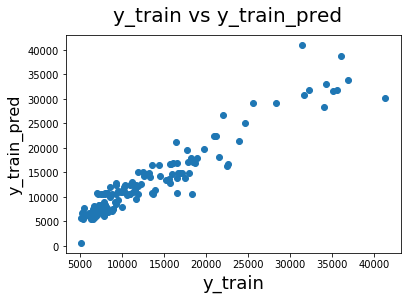

In [1106]:
# Plotting y_train and y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

#### R2 score of train dataset

In [1107]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price)


0.8992705708091316

#### Plotting Histogram of error terms

In [1108]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

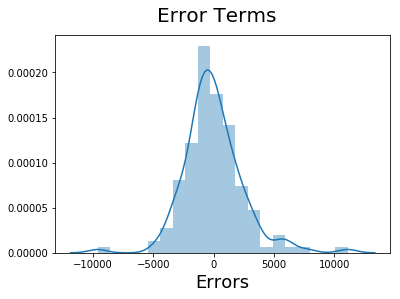

In [1109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Residual terms follow Normal distribution with mean at Zero

## Step 5: Making Predictions

#### Rescaling Test dataset

In [1110]:
#Minmax scaling the test dataset
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','curbweight',
       'peakrpm', 'power_weight_ratio', 'fueleconomyvalue']

df_test[num_vars] = scaler.transform(df_test[num_vars])


### Dividing into X_test and y_test

In [1111]:
y_test = df_test.pop('price')
X_test = df_test

In [1112]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)


#### Predicted value  for test data

In [1113]:
y_pred= lm.predict(X_test_new)

## Step 6: Model Evaluation

Text(0, 0.5, 'y_pred')

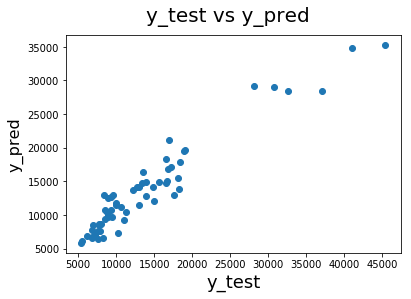

In [1114]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### R2 score for test data

In [1115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8986678382302792

In [1116]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        23:01:37   Log-Likelihood:                -1320.0
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     138   BIC:                             2665.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2133.8629    666

### Inference

R2 score for train data : 0.8992705708091316

R2 score for test data : 0.8986678382302792

1.R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896

2.F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fit is significant and explained 90% variance is just not by chance.

3.p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.